In [1]:
require "narray"
require "daru"
require "gnuplotrb"
include Daru
include GnuplotRB
include Fit
nil

"if(window['d3'] === undefined ||\n   window['Nyaplot'] === undefined){\n    var path = {\"d3\":\"https://cdnjs.cloudflare.com/ajax/libs/d3/3.5.5/d3.min\",\"downloadable\":\"http://cdn.rawgit.com/domitry/d3-downloadable/master/d3-downloadable\"};\n\n\n\n    var shim = {\"d3\":{\"exports\":\"d3\"},\"downloadable\":{\"exports\":\"downloadable\"}};\n\n    require.config({paths: path, shim:shim});\n\n\nrequire(['d3'], function(d3){window['d3']=d3;console.log('finished loading d3');require(['downloadable'], function(downloadable){window['downloadable']=downloadable;console.log('finished loading downloadable');\n\n\tvar script = d3.select(\"head\")\n\t    .append(\"script\")\n\t    .attr(\"src\", \"http://cdn.rawgit.com/domitry/Nyaplotjs/master/release/nyaplot.js\")\n\t    .attr(\"async\", true);\n\n\tscript[0][0].onload = script[0][0].onreadystatechange = function(){\n\n\n\t    var event = document.createEvent(\"HTMLEvents\");\n\t    event.initEvent(\"load_nyaplot\",false,false);\n\t    win

# Variables

In [2]:
prefix = "20160223_05_equil"

input_no2 = "../DOAS/#{prefix}_NO2.csv"
input_nox = "../DOAS/#{prefix}_NOx.csv"

nil

# Data preparation

In [3]:
no2 = DataFrame.from_csv(input_no2)
no2.vectors = Index.new(no2.vectors.to_a.map{|i| i.to_sym})
no2.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.0481823590258683,0.0947558956818219,-5467659.53713914,967963.818963227,0,1.15191267128248,0.0676607827424136,109.338296994652,1201.91919261121,2016-02-23T00:53:16+00:00
1,-0.0851571830728574,0.100080057163147,-5047536.60327257,1014540.47420533,1,1.08398523619352,0.0709107827951778,-228.568888845109,1259.48481385675,2016-02-23T00:53:28+00:00
2,-0.0564073141459853,0.0988372321213202,-5498871.51186052,1012998.67138189,4,1.2441594000494,0.0708177946456452,-208.754675059622,1257.96115364484,2016-02-23T00:54:02+00:00
3,-0.180092514602327,0.0957736696441042,-4998656.65590394,978553.547925887,8,1.08143996239448,0.0683946595512672,-377.042811749216,1215.06850396224,2016-02-23T00:54:46+00:00
4,-0.0251462101499728,0.101671973672629,-5160422.27785074,1025238.41035564,9,1.04734442122789,0.0716557224045568,115.153901656902,1272.62369732852,2016-02-23T00:54:58+00:00
5,-0.0658453468723807,0.105895897664447,-3755804.46955115,1083508.55966618,11,1.16993401257814,0.0757393730744575,-223.347220702732,1345.46201359586,2016-02-23T00:55:20+00:00
6,-0.266646548352868,0.102303938867181,-4046785.11766314,1038595.5963403,12,1.17874305816102,0.0726009317756074,17.3479716822013,1289.38885739436,2016-02-23T00:55:31+00:00
7,-0.0467553349175864,0.0943888592252582,-5458005.18795979,964730.64097458,13,1.15578149490553,0.0674352077357304,-33.367033392779,1197.91816988519,2016-02-23T00:55:43+00:00
8,0.0205566562829753,0.0953209581273256,-4724864.27807111,971755.828783965,14,1.14670752237976,0.0679253024086247,-54.6052071240975,1206.54883083215,2016-02-23T00:55:54+00:00
9,0.0641339531242313,0.0991785888092544,-3585220.23576092,1003438.32268088,15,1.18877122734927,0.0701450094490148,-233.711423725768,1245.63728468181,2016-02-23T00:56:05+00:00


In [4]:
nox = DataFrame.from_csv(input_nox)
nox.vectors = Index.new(nox.vectors.to_a.map{|i| i.to_sym})
nox.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,-0.0365531209416516,0.149862623182597,-5343572.69203752,1529382.71245024,59,15.8498548700274,0.109172055231816,697.119387031799,1898.10927608892,2016-02-23T01:04:25+00:00
1,-0.265307347600826,0.209253568713923,-4951656.1627438,2133857.79100894,60,23.9071671221403,0.154239448021337,2080.96148745527,2647.5017058991,2016-02-23T01:04:35+00:00
2,-0.274676330482159,0.209834161530701,-5786888.71988334,2138293.38947966,61,23.9902244235112,0.154579703155889,2244.63024215892,2652.96217163204,2016-02-23T01:04:45+00:00
3,-0.229788271957915,0.227036830791982,-3858451.20276952,2314307.30898095,62,23.8839053486749,0.167276036209107,1950.41241315543,2871.36747569378,2016-02-23T01:04:55+00:00
4,-0.267581451998139,0.210450379224733,-4198982.81724633,2144294.23196415,63,24.0301908680327,0.155023373118169,1916.85797710475,2660.36952390038,2016-02-23T01:05:06+00:00
5,-0.262990175620611,0.206916978743563,-4747884.49489429,2107730.40598319,64,23.9993487018046,0.152372265080194,1967.23899686306,2614.97687892392,2016-02-23T01:05:16+00:00
6,-0.325405405525288,0.216173206690168,-5528125.78314528,2203043.58587997,65,23.9567299824002,0.159252273920564,1677.88789431671,2733.28876929467,2016-02-23T01:05:26+00:00
7,-0.343863308695219,0.212397137695201,-4825146.28725949,2164960.99952885,66,23.9860167919074,0.156506758079736,2336.29958084263,2686.06530159765,2016-02-23T01:05:36+00:00
8,-0.382804418624892,0.207830347010684,-3960967.17022401,2117486.52628004,67,23.9595324763104,0.153067936641703,2106.57276389658,2627.12814621717,2016-02-23T01:05:47+00:00
9,-0.223315856368553,0.205114716110853,-3955434.75431664,2090944.80703839,68,23.9856414637864,0.151156139081743,1514.66332612783,2594.24549897047,2016-02-23T01:05:57+00:00


In [5]:
ts = no2.concat(nox)
ts.sort([:timestamp])

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp
0,0.0481823590258683,0.0947558956818219,-5467659.53713914,967963.818963227,0,1.15191267128248,0.0676607827424136,109.338296994652,1201.91919261121,2016-02-23T00:53:16+00:00
1,-0.0851571830728574,0.100080057163147,-5047536.60327257,1014540.47420533,1,1.08398523619352,0.0709107827951778,-228.568888845109,1259.48481385675,2016-02-23T00:53:28+00:00
2,-0.0564073141459853,0.0988372321213202,-5498871.51186052,1012998.67138189,4,1.2441594000494,0.0708177946456452,-208.754675059622,1257.96115364484,2016-02-23T00:54:02+00:00
3,-0.180092514602327,0.0957736696441042,-4998656.65590394,978553.547925887,8,1.08143996239448,0.0683946595512672,-377.042811749216,1215.06850396224,2016-02-23T00:54:46+00:00
4,-0.0251462101499728,0.101671973672629,-5160422.27785074,1025238.41035564,9,1.04734442122789,0.0716557224045568,115.153901656902,1272.62369732852,2016-02-23T00:54:58+00:00
5,-0.0658453468723807,0.105895897664447,-3755804.46955115,1083508.55966618,11,1.16993401257814,0.0757393730744575,-223.347220702732,1345.46201359586,2016-02-23T00:55:20+00:00
6,-0.266646548352868,0.102303938867181,-4046785.11766314,1038595.5963403,12,1.17874305816102,0.0726009317756074,17.3479716822013,1289.38885739436,2016-02-23T00:55:31+00:00
7,-0.0467553349175864,0.0943888592252582,-5458005.18795979,964730.64097458,13,1.15578149490553,0.0674352077357304,-33.367033392779,1197.91816988519,2016-02-23T00:55:43+00:00
8,0.0205566562829753,0.0953209581273256,-4724864.27807111,971755.828783965,14,1.14670752237976,0.0679253024086247,-54.6052071240975,1206.54883083215,2016-02-23T00:55:54+00:00
9,0.0641339531242313,0.0991785888092544,-3585220.23576092,1003438.32268088,15,1.18877122734927,0.0701450094490148,-233.711423725768,1245.63728468181,2016-02-23T00:56:05+00:00


In [6]:
ts[:timestamp].head

#<Daru::Vector:22136780 @name = nil @size = 10 >
                                      nil
                   0 2016-02-23T00:53:16+
                   1 2016-02-23T00:53:28+
                   2 2016-02-23T00:54:02+
                   3 2016-02-23T00:54:46+
                   4 2016-02-23T00:54:58+
                   5 2016-02-23T00:55:20+
                   6 2016-02-23T00:55:31+
                   7 2016-02-23T00:55:43+
                   8 2016-02-23T00:55:54+
                   9 2016-02-23T00:56:05+

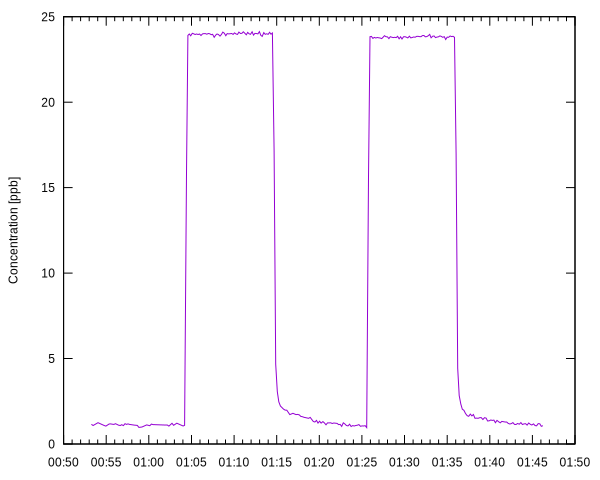

In [7]:
ts.index = DateTimeIndex.new(ts[:timestamp])

Plot.new(
  [ts[:no2], with: "lines", title: ""],
  format_x: "%H:%M",
  ylabel: "Concentration [ppb]")

In [8]:
offset = ts[:timestamp].first

ts[:s] = ts[:timestamp].collect do |t|
  (t - offset).to_f*24*60*60
end
ts.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
2016-02-23T00:53:16+00:00,0.0481823590258683,0.0947558956818219,-5467659.53713914,967963.818963227,0,1.15191267128248,0.0676607827424136,109.338296994652,1201.91919261121,2016-02-23T00:53:16+00:00,0.0
2016-02-23T00:53:28+00:00,-0.0851571830728574,0.100080057163147,-5047536.60327257,1014540.47420533,1,1.08398523619352,0.0709107827951778,-228.568888845109,1259.48481385675,2016-02-23T00:53:28+00:00,11.999999999999998
2016-02-23T00:54:02+00:00,-0.0564073141459853,0.0988372321213202,-5498871.51186052,1012998.67138189,4,1.2441594000494,0.0708177946456452,-208.754675059622,1257.96115364484,2016-02-23T00:54:02+00:00,46.0
2016-02-23T00:54:46+00:00,-0.180092514602327,0.0957736696441042,-4998656.65590394,978553.547925887,8,1.08143996239448,0.0683946595512672,-377.042811749216,1215.06850396224,2016-02-23T00:54:46+00:00,90.0
2016-02-23T00:54:58+00:00,-0.0251462101499728,0.101671973672629,-5160422.27785074,1025238.41035564,9,1.04734442122789,0.0716557224045568,115.153901656902,1272.62369732852,2016-02-23T00:54:58+00:00,102.00000000000001
2016-02-23T00:55:20+00:00,-0.0658453468723807,0.105895897664447,-3755804.46955115,1083508.55966618,11,1.16993401257814,0.0757393730744575,-223.347220702732,1345.46201359586,2016-02-23T00:55:20+00:00,123.99999999999999
2016-02-23T00:55:31+00:00,-0.266646548352868,0.102303938867181,-4046785.11766314,1038595.5963403,12,1.17874305816102,0.0726009317756074,17.3479716822013,1289.38885739436,2016-02-23T00:55:31+00:00,135.00000000000003
2016-02-23T00:55:43+00:00,-0.0467553349175864,0.0943888592252582,-5458005.18795979,964730.64097458,13,1.15578149490553,0.0674352077357304,-33.367033392779,1197.91816988519,2016-02-23T00:55:43+00:00,147.0
2016-02-23T00:55:54+00:00,0.0205566562829753,0.0953209581273256,-4724864.27807111,971755.828783965,14,1.14670752237976,0.0679253024086247,-54.6052071240975,1206.54883083215,2016-02-23T00:55:54+00:00,158.0
2016-02-23T00:56:05+00:00,0.0641339531242313,0.0991785888092544,-3585220.23576092,1003438.32268088,15,1.18877122734927,0.0701450094490148,-233.711423725768,1245.63728468181,2016-02-23T00:56:05+00:00,169.0


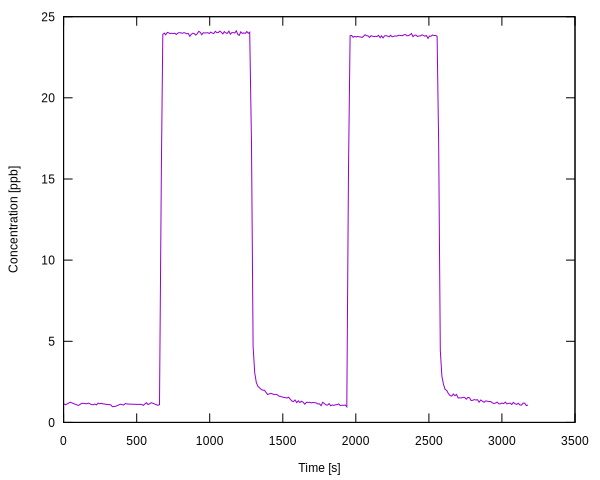

In [9]:


Plot.new(
  [ts[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [10]:
ts.index = Index.new((0..(ts.nrows - 1)).to_a)

ts.each_row_with_index do |row,i|
  if i+1 < ts.nrows and (row[:no2] - ts.row[i+1][:no2]).abs > 5
    puts i
    puts row[:no2]
  end 
end
nil

33
1.0923632280729
34
15.8498548700274
93
24.0455010547526
94
17.1402823577342
146
0.962070904789899
147
15.6036420185571
206
23.7952482224845
207
16.9608819025228


In [11]:
ts_fit = ts.row[93..145]
offset = ts_fit[:s].first
ts_fit[:s] = ts_fit[:s] - offset
ts_fit.head

,chocho,chocho_err,h2o,h2o_err,index,no2,no2_err,o3,o3_err,timestamp,s
93,-0.185273923366381,0.21467397340187,-3885264.47672354,2188372.23702979,118,24.0455010547526,0.158214245998123,2491.01822586417,2715.1107563023,2016-02-23T01:14:30+00:00,0.0
94,-0.14671195753687,0.16781339634335,-5152811.00419613,1711515.59186503,60,17.1402823577342,0.122412680330537,1224.2662512853,2124.03521211264,2016-02-23T01:14:42+00:00,12.0
95,0.037072435162017,0.103609668343377,-5466319.58361337,1055312.62620712,61,4.67012704557997,0.0741165904984626,-391.989839574875,1310.12338129674,2016-02-23T01:14:53+00:00,23.0
96,-0.0111674769114268,0.103703526361948,-5084268.81097266,1056389.67706854,62,3.06815399628809,0.0740313740910367,66.7261069651081,1311.53667620428,2016-02-23T01:15:04+00:00,34.0
97,-0.0328368108678695,0.0951309982771695,-4537949.71573512,970444.870384818,63,2.46610150728208,0.0679534399019231,150.168534129691,1204.89016945737,2016-02-23T01:15:15+00:00,45.0
98,0.0279494252440434,0.10398448718378,-4951971.45048209,1069915.88718756,64,2.22327111934955,0.0748942850642032,710.855682643396,1328.76123961723,2016-02-23T01:15:26+00:00,56.0
99,0.0309271955518586,0.109153423108385,-5124028.06173293,1116246.19333411,66,2.03991298685238,0.0781184842016036,807.352462008238,1386.0308682733,2016-02-23T01:15:48+00:00,78.0
100,0.0608025740797224,0.100552968615699,-4084481.13050077,1023058.4397163,67,1.9816247383905,0.071591086128753,408.625890588115,1270.14739359746,2016-02-23T01:15:59+00:00,89.0
101,-0.0519079905011414,0.101343094956053,-6165588.69548857,1034604.27338563,68,1.97674318814289,0.0723986305397389,-76.4522009765106,1284.59767781117,2016-02-23T01:16:11+00:00,101.0
102,0.0057560951503172,0.100042862830743,-4924144.39196613,1018389.00343946,70,1.72230866746324,0.0712396552134395,-136.106016358324,1264.37033680794,2016-02-23T01:16:32+00:00,122.0


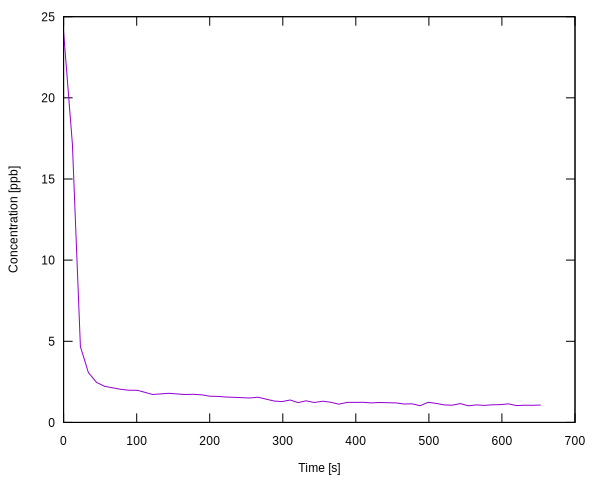

In [12]:
plot_fit = Plot.new(
  [ts_fit[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [13]:
fit = fit(ts_fit[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 1, b: 25, t: 60*10, c: -0.001}, using: "2:3")
fit[:formula_ds].data

" 1.65729 + -0.000981003*x + 23.4802*exp(-x/16.4492) "

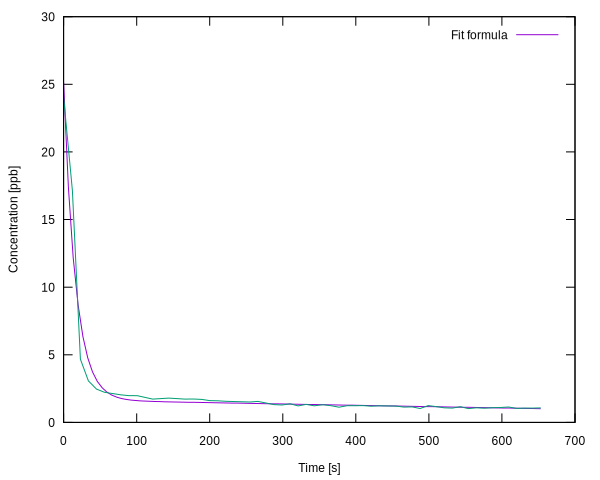

In [14]:
plot_fit << fit[:formula_ds]

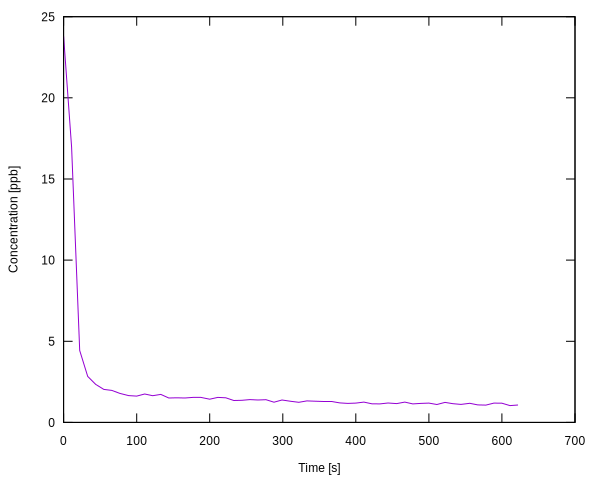

In [15]:
ts_fit2 = ts.row[206..(ts.nrows - 1)]
ts_fit2[:s] = ts_fit2[:s] - ts_fit2[:s].first
plot_fit2 = Plot.new(
  [ts_fit2[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [16]:
fit2= fit(ts_fit2[:s,:no2], function: "a + c*x + b*exp(-x/t)", initials: {a: 1, b: 25, t: 60*10, c: -0.001}, using: "2:3")
fit2[:formula_ds].data

" 1.5072 + -0.000645277*x + 23.3714*exp(-x/15.5273) "

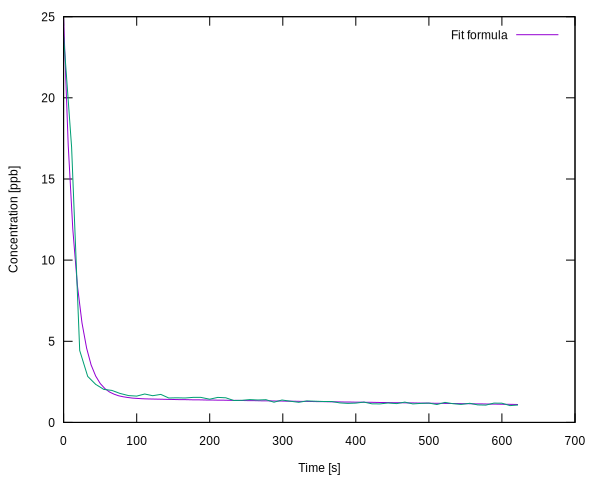

In [17]:
plot_fit2 << fit2[:formula_ds]

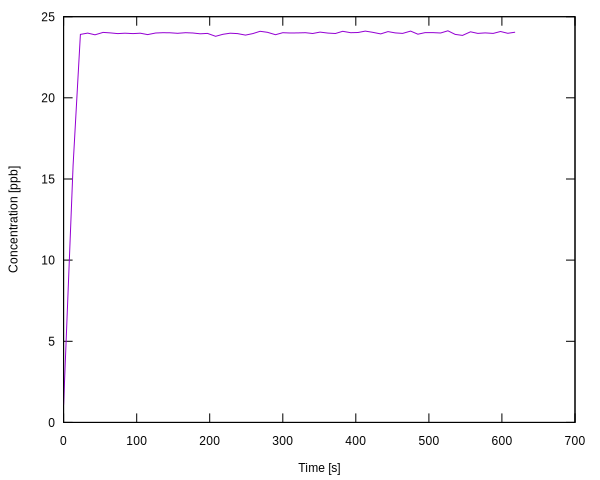

In [18]:
ts_fit3 = ts.row[33..93]
ts_fit3[:s] -= ts_fit3[:s].first
plot_fit3 = Plot.new(
  [ts_fit3[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [19]:
fit3 = fit(ts_fit3[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit3[:formula_ds].data

" 24.0263 + -23.1667*exp(-x/10.0728) "

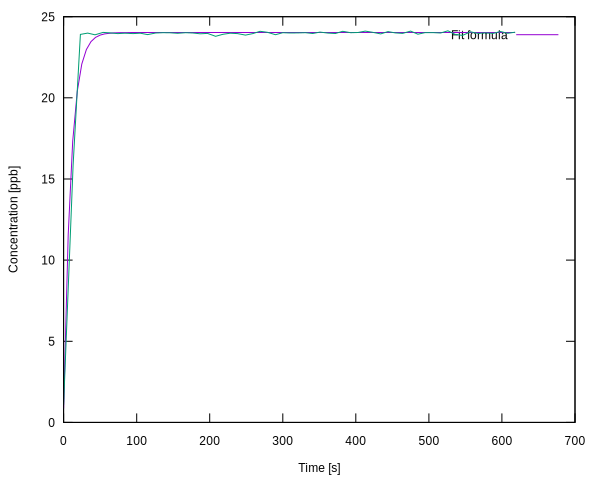

In [20]:
plot_fit3 << fit3[:formula_ds]

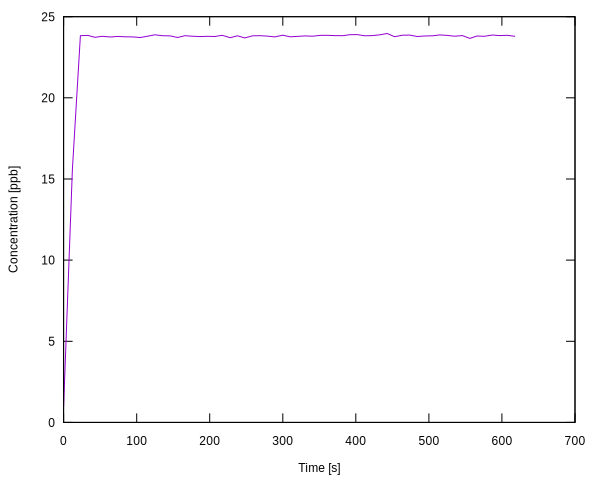

In [21]:
ts_fit4 = ts.row[146..206]
ts_fit4[:s] -= ts_fit4[:s].first
plot_fit4 = Plot.new(
  [ts_fit4[:s, :no2], using: "2:3", with: "lines", title: ""],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]")

In [22]:
fit4 = fit(ts_fit4[:s,:no2], function: "a + b*exp(-x/t)", initials: {a: 24, b: -23, t: 10}, using: "2:3")
fit4[:formula_ds].data

" 23.8448 + -23.1119*exp(-x/9.66115) "

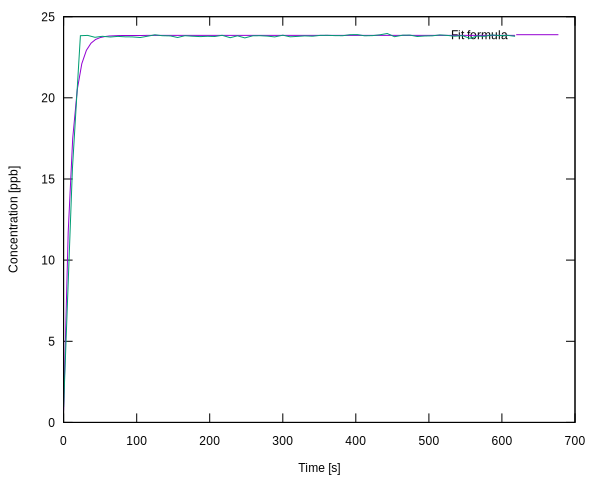

In [23]:
plot_fit4 << fit4[:formula_ds]

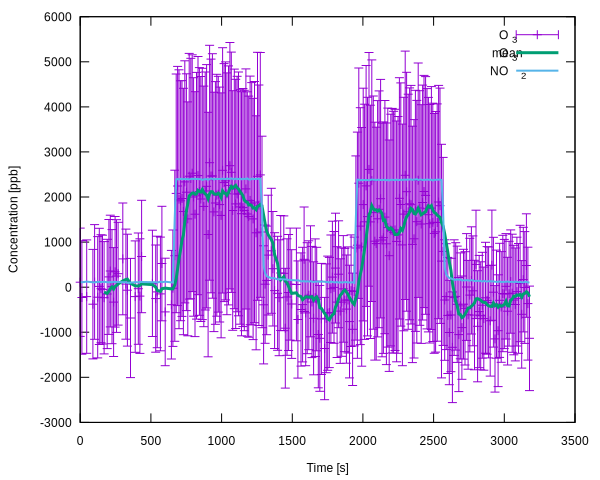

In [54]:
ts[:o3_mean] = ts[:o3].rolling_mean
ts[:no2_scaled] = ts[:no2]*100
Plot.new(
  [ts[:s, :o3, :o3_err], using: "2:3:4", with: "yerrorbars", title: "O_3"],
  [ts[:s, :o3_mean], using: "2:3", with: "lines", title: "O_3 mean", lw: "3"],
  [ts[:s, :no2_scaled], using: "2:3", with: "lines", title: "NO_2", lw: "2"],
  xlabel: "Time [s]",
  ylabel: "Concentration [ppb]"
  )

In [48]:
fit4[:deltas]

{:a=>0.04869, :b=>0.3688, :t=>0.371}

In [49]:
fit4[:coefficients]

{:a=>23.8448, :b=>-23.1119, :t=>9.66115}